<a href="https://colab.research.google.com/github/TanayRvp19/PROJECTS/blob/main/nifty_50_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import time
import pickle
import seaborn as sns
import plotly.io as pio



In [4]:
from google.colab import files
 
 
uploaded = files.upload()

Saving National_Stock_Exchange_of_India_Ltd.csv to National_Stock_Exchange_of_India_Ltd.csv


In [7]:


import io
 
df = pd.read_csv(io.BytesIO(uploaded['National_Stock_Exchange_of_India_Ltd.csv']))
print(df)

        Symbol       Open       High        Low        LTP    Chng  % Chng  \
0   ADANIPORTS        750        766     713.25        715  -47.45   -6.22   
1   ASIANPAINT   3,101.00   3,167.35   3,091.00   3,138.00   -6.25   -0.20   
2     AXISBANK        669      674.9     660.45        661  -18.90   -2.78   
3   BAJAJ-AUTO   3,370.00   3,383.50   3,320.00   3,335.00  -56.70   -1.67   
4   BAJAJFINSV  17,200.00  17,237.20  16,610.00  16,684.00 -684.85   -3.94   
5   BAJFINANCE   7,021.00   7,047.90   6,775.00   6,780.00 -345.80   -4.85   
6   BHARTIARTL        763        763      733.1     735.85  -29.30   -3.83   
7         BPCL     397.15      397.2        375      377.4  -22.70   -5.67   
8    BRITANNIA   3,560.00   3,635.10   3,533.95   3,566.60   -6.80   -0.19   
9        CIPLA        892     976.05     890.65        965   65.05    7.23   
10   COALINDIA     157.75      159.4     155.35      155.9   -2.65   -1.67   
11    DIVISLAB   4,770.00   5,077.70   4,756.75   4,940.00  140.

In [8]:
df.dtypes

Symbol              object
Open                object
High                object
Low                 object
LTP                 object
Chng               float64
% Chng             float64
Volume (lacs)      float64
Turnover (crs.)     object
52w H               object
52w L               object
365 d % chng       float64
30 d % chng        float64
dtype: object

In [9]:
#converting object type to float
df['Open'] = df['Open'].str.replace(',','')
df['Open'] = df['Open'].astype(float)

df['High'] = df['High'].str.replace(',','')
df['High'] = df['High'].astype(float)

df['Low'] = df['Low'].str.replace(',','')
df['Low'] = df['Low'].astype(float)

df['LTP'] = df['LTP'].str.replace(',','')
df['LTP'] = df['LTP'].astype(float)

df['Turnover (crs.)'] = df['Turnover (crs.)'].str.replace(',','')
df['Turnover (crs.)'] = df['Turnover (crs.)'].astype(float)

df['52w H'] = df['52w H'].str.replace(',','')
df['52w H'] = df['52w H'].astype(float)

df['52w L'] = df['52w L'].str.replace(',','')
df['52w L'] = df['52w L'].astype(float)

In [10]:
df

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750.00,766.00,713.25,715.00,-47.45,-6.22,72.20,532.63,901.00,384.40,79.22,-4.65
1,ASIANPAINT,3101.00,3167.35,3091.00,3138.00,-6.25,-0.20,10.29,322.53,3505.00,2117.15,45.66,5.66
2,AXISBANK,669.00,674.90,660.45,661.00,-18.90,-2.78,102.53,684.00,866.90,568.40,10.19,-21.49
3,BAJAJ-AUTO,3370.00,3383.50,3320.00,3335.00,-56.70,-1.67,3.42,114.59,4361.40,3041.00,9.30,-12.05
4,BAJAJFINSV,17200.00,17237.20,16610.00,16684.00,-684.85,-3.94,3.42,576.79,19325.00,8273.70,91.38,-9.10
5,BAJFINANCE,7021.00,7047.90,6775.00,6780.00,-345.80,-4.85,16.89,1161.63,8050.00,4362.00,44.57,-13.69
6,BHARTIARTL,763.00,763.00,733.10,735.85,-29.30,-3.83,111.43,830.06,781.80,454.11,58.55,5.70
7,BPCL,397.15,397.20,375.00,377.40,-22.70,-5.67,100.23,383.54,503.00,357.00,-1.22,-12.45
8,BRITANNIA,3560.00,3635.10,3533.95,3566.60,-6.80,-0.19,3.73,133.23,4153.00,3317.30,0.30,-3.42
9,CIPLA,892.00,976.05,890.65,965.00,65.05,7.23,144.59,1380.90,1005.00,726.50,31.89,6.34


In [11]:
df.info

<bound method DataFrame.info of         Symbol      Open      High       Low       LTP    Chng  % Chng  \
0   ADANIPORTS    750.00    766.00    713.25    715.00  -47.45   -6.22   
1   ASIANPAINT   3101.00   3167.35   3091.00   3138.00   -6.25   -0.20   
2     AXISBANK    669.00    674.90    660.45    661.00  -18.90   -2.78   
3   BAJAJ-AUTO   3370.00   3383.50   3320.00   3335.00  -56.70   -1.67   
4   BAJAJFINSV  17200.00  17237.20  16610.00  16684.00 -684.85   -3.94   
5   BAJFINANCE   7021.00   7047.90   6775.00   6780.00 -345.80   -4.85   
6   BHARTIARTL    763.00    763.00    733.10    735.85  -29.30   -3.83   
7         BPCL    397.15    397.20    375.00    377.40  -22.70   -5.67   
8    BRITANNIA   3560.00   3635.10   3533.95   3566.60   -6.80   -0.19   
9        CIPLA    892.00    976.05    890.65    965.00   65.05    7.23   
10   COALINDIA    157.75    159.40    155.35    155.90   -2.65   -1.67   
11    DIVISLAB   4770.00   5077.70   4756.75   4940.00  140.20    2.92   
12    

In [13]:
nums_cols = df.select_dtypes(exclude=['object']).columns
nums_cols

Index(['Open', 'High', 'Low', 'LTP', 'Chng', '% Chng', 'Volume (lacs)',
       'Turnover (crs.)', '52w H', '52w L', '365 d % chng', '30 d % chng'],
      dtype='object')

In [14]:
str_cols=df.select_dtypes(exclude=['float']).columns
str_cols

Index(['Symbol'], dtype='object')

In [15]:
df.describe()

,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2985.739000,3017.261000,2914.208000,2939.569000,-70.133000,-2.930200,71.266600,569.706800,3440.588000,2208.556800,41.203000,-5.996800
std,5024.412163,5057.739037,4911.417131,4943.921262,163.203678,2.677007,93.462062,492.383108,5813.045344,3962.991087,37.358646,6.322546
min,125.600000,125.600000,120.500000,121.150000,-770.500000,-7.480000,0.300000,76.940000,141.500000,77.050000,-16.020000,-22.080000
25%,673.000000,678.425000,662.112500,663.187500,-66.775000,-4.527500,13.472500,195.897500,777.825000,391.837500,9.375000,-9.665000
50%,1155.950000,1156.750000,1105.750000,1121.250000,-29.975000,-3.300000,30.750000,463.430000,1456.125000,819.775000,35.860000,-5.705000
75%,2760.262500,2789.425000,2668.537500,2690.450000,-7.812500,-1.932500,99.200000,744.502500,3388.000000,2272.600000,65.942500,-2.222500
max,26450.000000,26539.900000,25812.000000,25900.000000,158.400000,7.230000,517.880000,2430.360000,32048.000000,22531.000000,167.950000,6.360000


In [16]:
df.isna().sum()

Symbol             0
Open               0
High               0
Low                0
LTP                0
Chng               0
% Chng             0
Volume (lacs)      0
Turnover (crs.)    0
52w H              0
52w L              0
365 d % chng       0
30 d % chng        0
dtype: int64

In [18]:
for col in nums_cols:
    print("Column : ", col)
    print(f"Value counts of {col}: ",df[col].value_counts().sum())
    print(f"Number of Unique Values in {col}: ",df[col].nunique())
    print()

Column :  Open
Value counts of Open:  50
Number of Unique Values in Open:  50

Column :  High
Value counts of High:  50
Number of Unique Values in High:  50

Column :  Low
Value counts of Low:  50
Number of Unique Values in Low:  50

Column :  LTP
Value counts of LTP:  50
Number of Unique Values in LTP:  50

Column :  Chng
Value counts of Chng:  50
Number of Unique Values in Chng:  50

Column :  % Chng
Value counts of % Chng:  50
Number of Unique Values in % Chng:  48

Column :  Volume (lacs)
Value counts of Volume (lacs):  50
Number of Unique Values in Volume (lacs):  49

Column :  Turnover (crs.)
Value counts of Turnover (crs.):  50
Number of Unique Values in Turnover (crs.):  50

Column :  52w H
Value counts of 52w H:  50
Number of Unique Values in 52w H:  50

Column :  52w L
Value counts of 52w L:  50
Number of Unique Values in 52w L:  50

Column :  365 d % chng
Value counts of 365 d % chng:  50
Number of Unique Values in 365 d % chng:  50

Column :  30 d % chng
Value counts of 30 

In [19]:
for cols in str_cols:
    print("Column : ", cols)
    print(f"Value counts of {cols}: ",df[cols].value_counts().sum())
    print(f"Number of Unique Values in {cols}: ",df[cols].nunique())
    print()

Column :  Symbol
Value counts of Symbol:  50
Number of Unique Values in Symbol:  50



<function matplotlib.pyplot.show(close=None, block=None)>

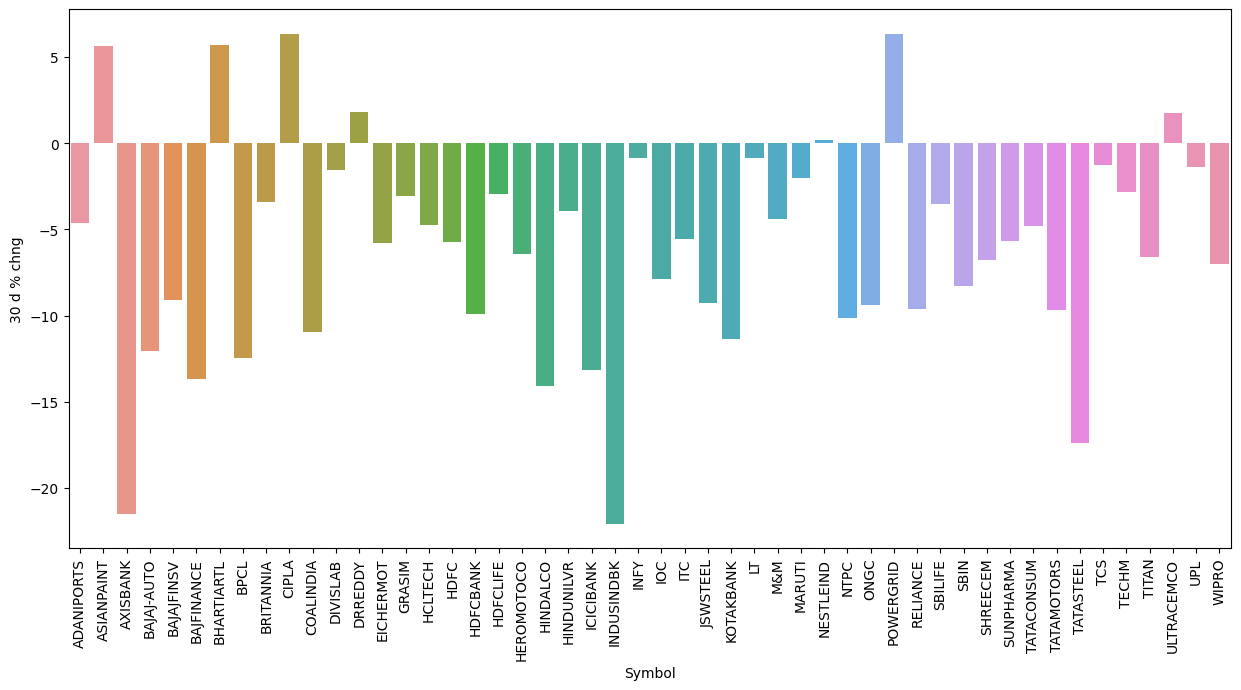

In [20]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)


sns.barplot(data = df, x = 'Symbol', y = '30 d % chng')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

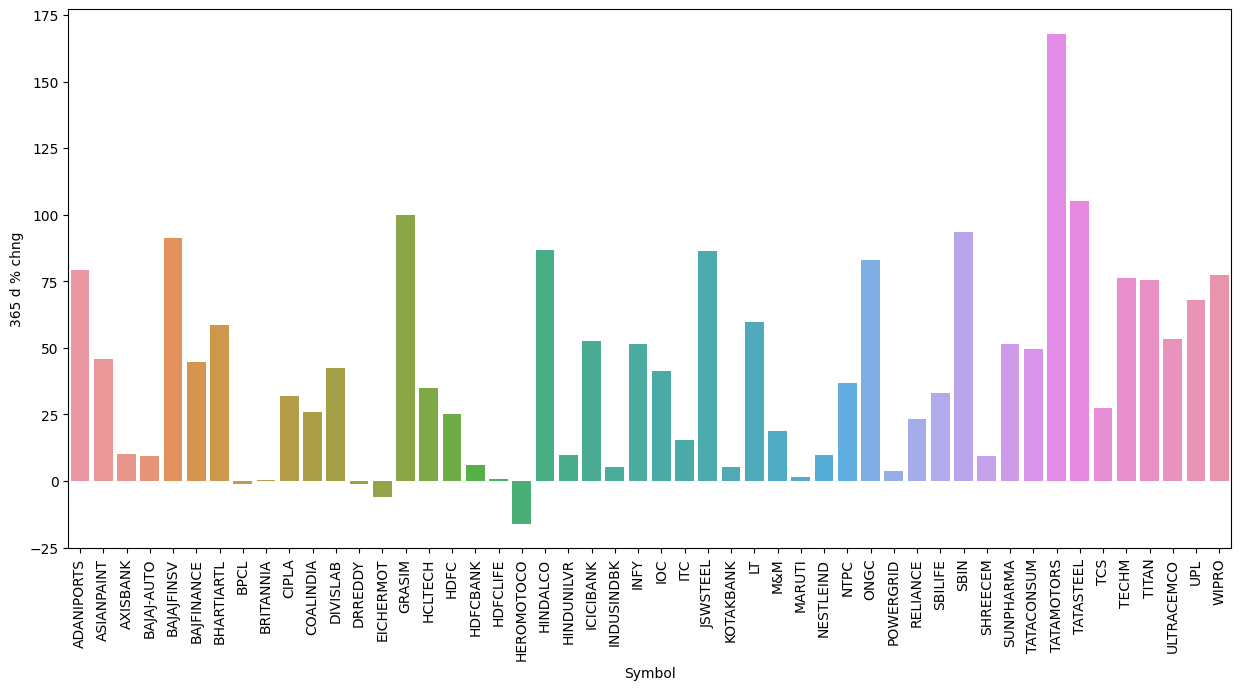

In [21]:
# majority company have shown negative returns when invested for a month

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)


sns.barplot(data = df, x = 'Symbol', y = '365 d % chng')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

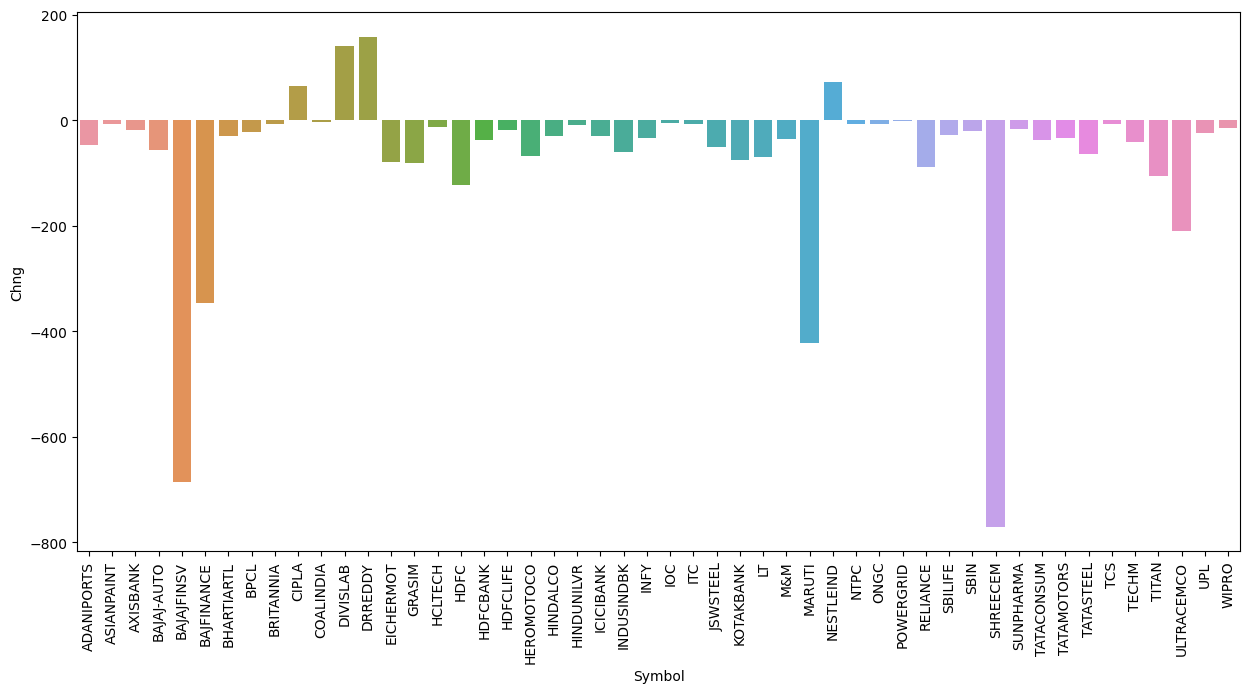

In [22]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)


sns.barplot(data = df, x = 'Symbol', y = 'Chng')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

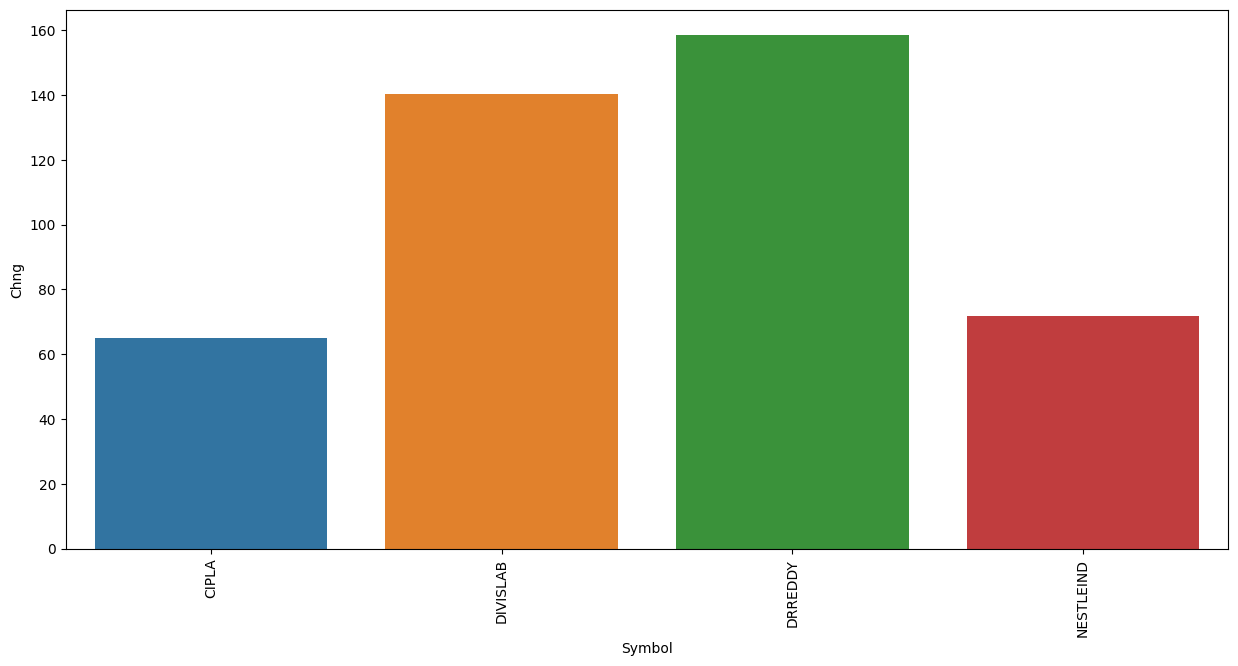

In [23]:
df[(df['Chng']>0)]

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)


sns.barplot(data = df[(df['Chng']>0)], x = 'Symbol', y = 'Chng')
plt.show

Text(0.5, 1.0, 'Heatmap of Attributes to check the correlation')

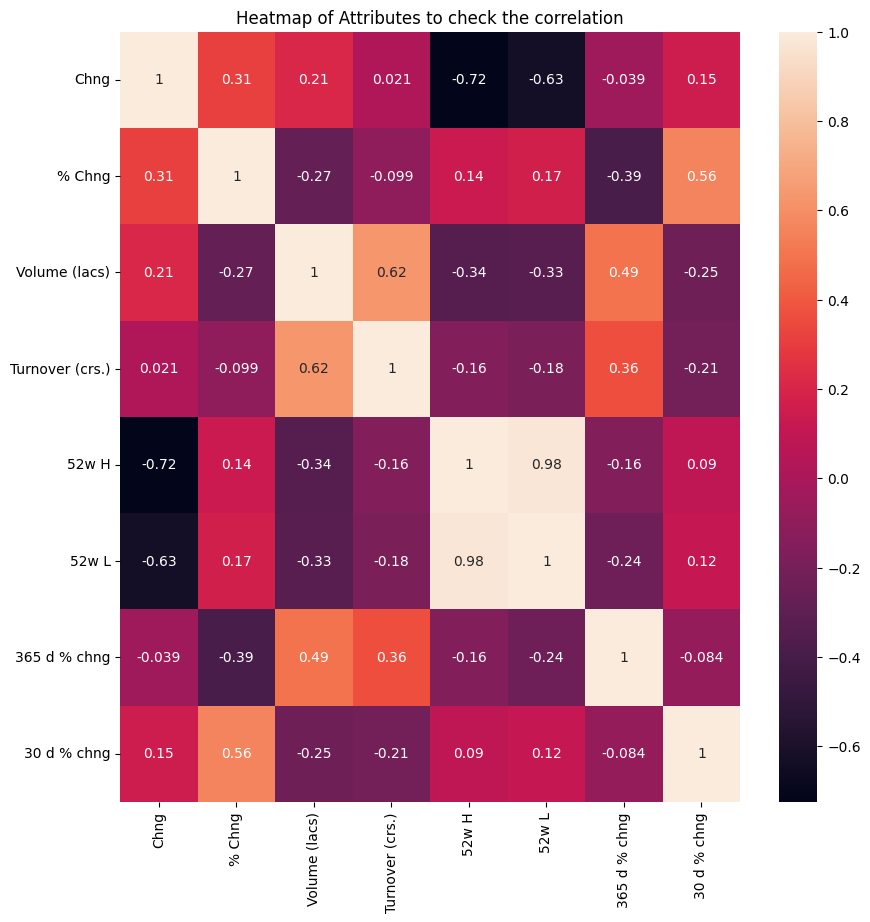

In [24]:
nifty_50=df.iloc[:,5:]

nifty_50_corr=nifty_50.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(nifty_50_corr,annot=True)
plt.title("Heatmap of Attributes to check the correlation")